In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\AL\Downloads\car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing values in data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [37]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Data Preprocesssing

In [7]:
df1=df.drop('Car_Name',axis=1)


I am dropping the column 'Car_Name'.

In [8]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df1['Total_years']=2024-df1['Year']


In [10]:
df2=df1.drop('Year',axis=1)
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


Exploratory data analysis

In [71]:
categorical_cols=['Fuel_Type','Seller_Type','Transmission','Owner']

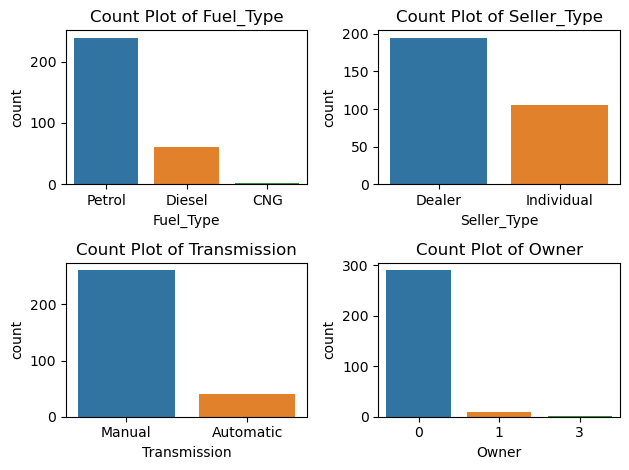

In [82]:
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')

plt.tight_layout()
plt.show()

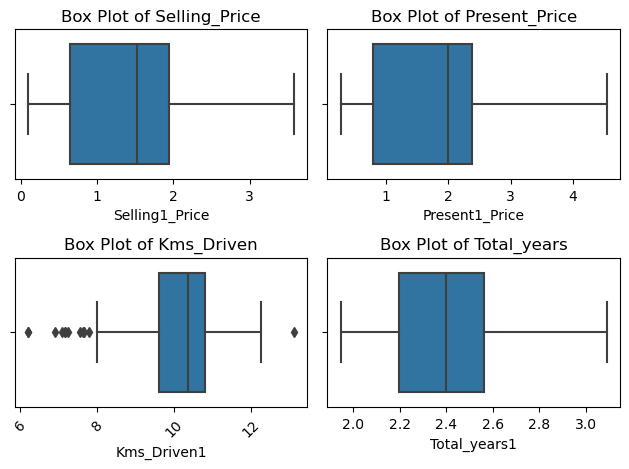

In [28]:
num_cols=df2[['Selling1_Price','Present1_Price','Kms_Driven1','Total_years1']]
plt.subplot(2, 2, 1)
sns.boxplot(x='Selling1_Price',data=df2)
plt.title('Box Plot of Selling_Price')

plt.subplot(2, 2, 2)
sns.boxplot(x='Present1_Price', data=df2)
plt.title('Box Plot of Present_Price')

plt.subplot(2, 2, 3)
sns.boxplot(x='Kms_Driven1', data=df2)
plt.xticks(rotation=45)
plt.title('Box Plot of Kms_Driven')


plt.subplot(2, 2, 4)
sns.boxplot(x='Total_years1', data=df2)
plt.title('Box Plot of Total_years')

plt.tight_layout()
plt.show()

In [29]:
print(num_cols.skew())


Selling1_Price    0.115141
Present1_Price   -0.047387
Kms_Driven1      -1.048906
Total_years1      0.658669
dtype: float64


In [16]:
# Apply log transformation
df2['Selling1_Price'] = np.log(df2['Selling_Price'] + 1)  # Add 1 to avoid log(0)

In [22]:
df2['Present1_Price'] = np.log(df2['Present_Price'] + 1)  # Add 1 to avoid log(0)

In [24]:
df2['Kms_Driven1'] = np.log(df2['Kms_Driven'] + 1)  # Add 1 to avoid log(0)

In [25]:
df2['Total_years1'] = np.log(df2['Total_years'] + 1)  # Add 1 to avoid log(0)

In [37]:
df2.head()


ValueError: could not convert string to float: 'Petrol'

ValueError: could not convert string to float: 'Petrol'

In [41]:
df2_encoded = pd.get_dummies(df2, columns=['Fuel_Type', 'Seller_Type','Transmission'],drop_first=True,dtype=int)

In [42]:
df2_encoded.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Total_years,Selling1_Price,Present1_Price,Kms_Driven1,Total_years1,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,1.470176,1.885553,10.203629,2.397895,0,1,0,1
1,4.75,9.54,43000,0,11,1.749200,2.355178,10.668979,2.484907,1,0,0,1
2,7.25,9.85,6900,0,7,2.110213,2.384165,8.839422,2.079442,0,1,0,1
3,2.85,4.15,5200,0,13,1.348073,1.638997,8.556606,2.639057,0,1,0,1
4,4.60,6.87,42450,0,10,1.722767,2.063058,10.656106,2.397895,1,0,0,1


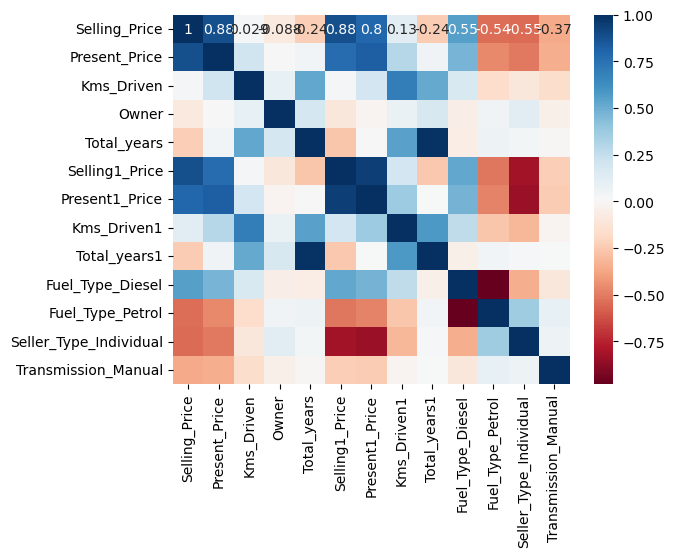

In [43]:
sns.heatmap(df2_encoded.corr(), annot=True, cmap="RdBu")
plt.show()

In [49]:
df3=df2_encoded.drop(['Selling_Price','Present_Price','Kms_Driven','Total_years'],axis=1)
df3.head()

,Owner,Selling1_Price,Present1_Price,Kms_Driven1,Total_years1,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1.470176,1.885553,10.203629,2.397895,0,1,0,1
1,0,1.749200,2.355178,10.668979,2.484907,1,0,0,1
2,0,2.110213,2.384165,8.839422,2.079442,0,1,0,1
3,0,1.348073,1.638997,8.556606,2.639057,0,1,0,1
4,0,1.722767,2.063058,10.656106,2.397895,1,0,0,1


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
X = df3.drop('Selling1_Price', axis=1)
y = df3['Selling1_Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [72]:
r2

0.9449328104747722

In [74]:
# Save the model to a file
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

C:\Users\AL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

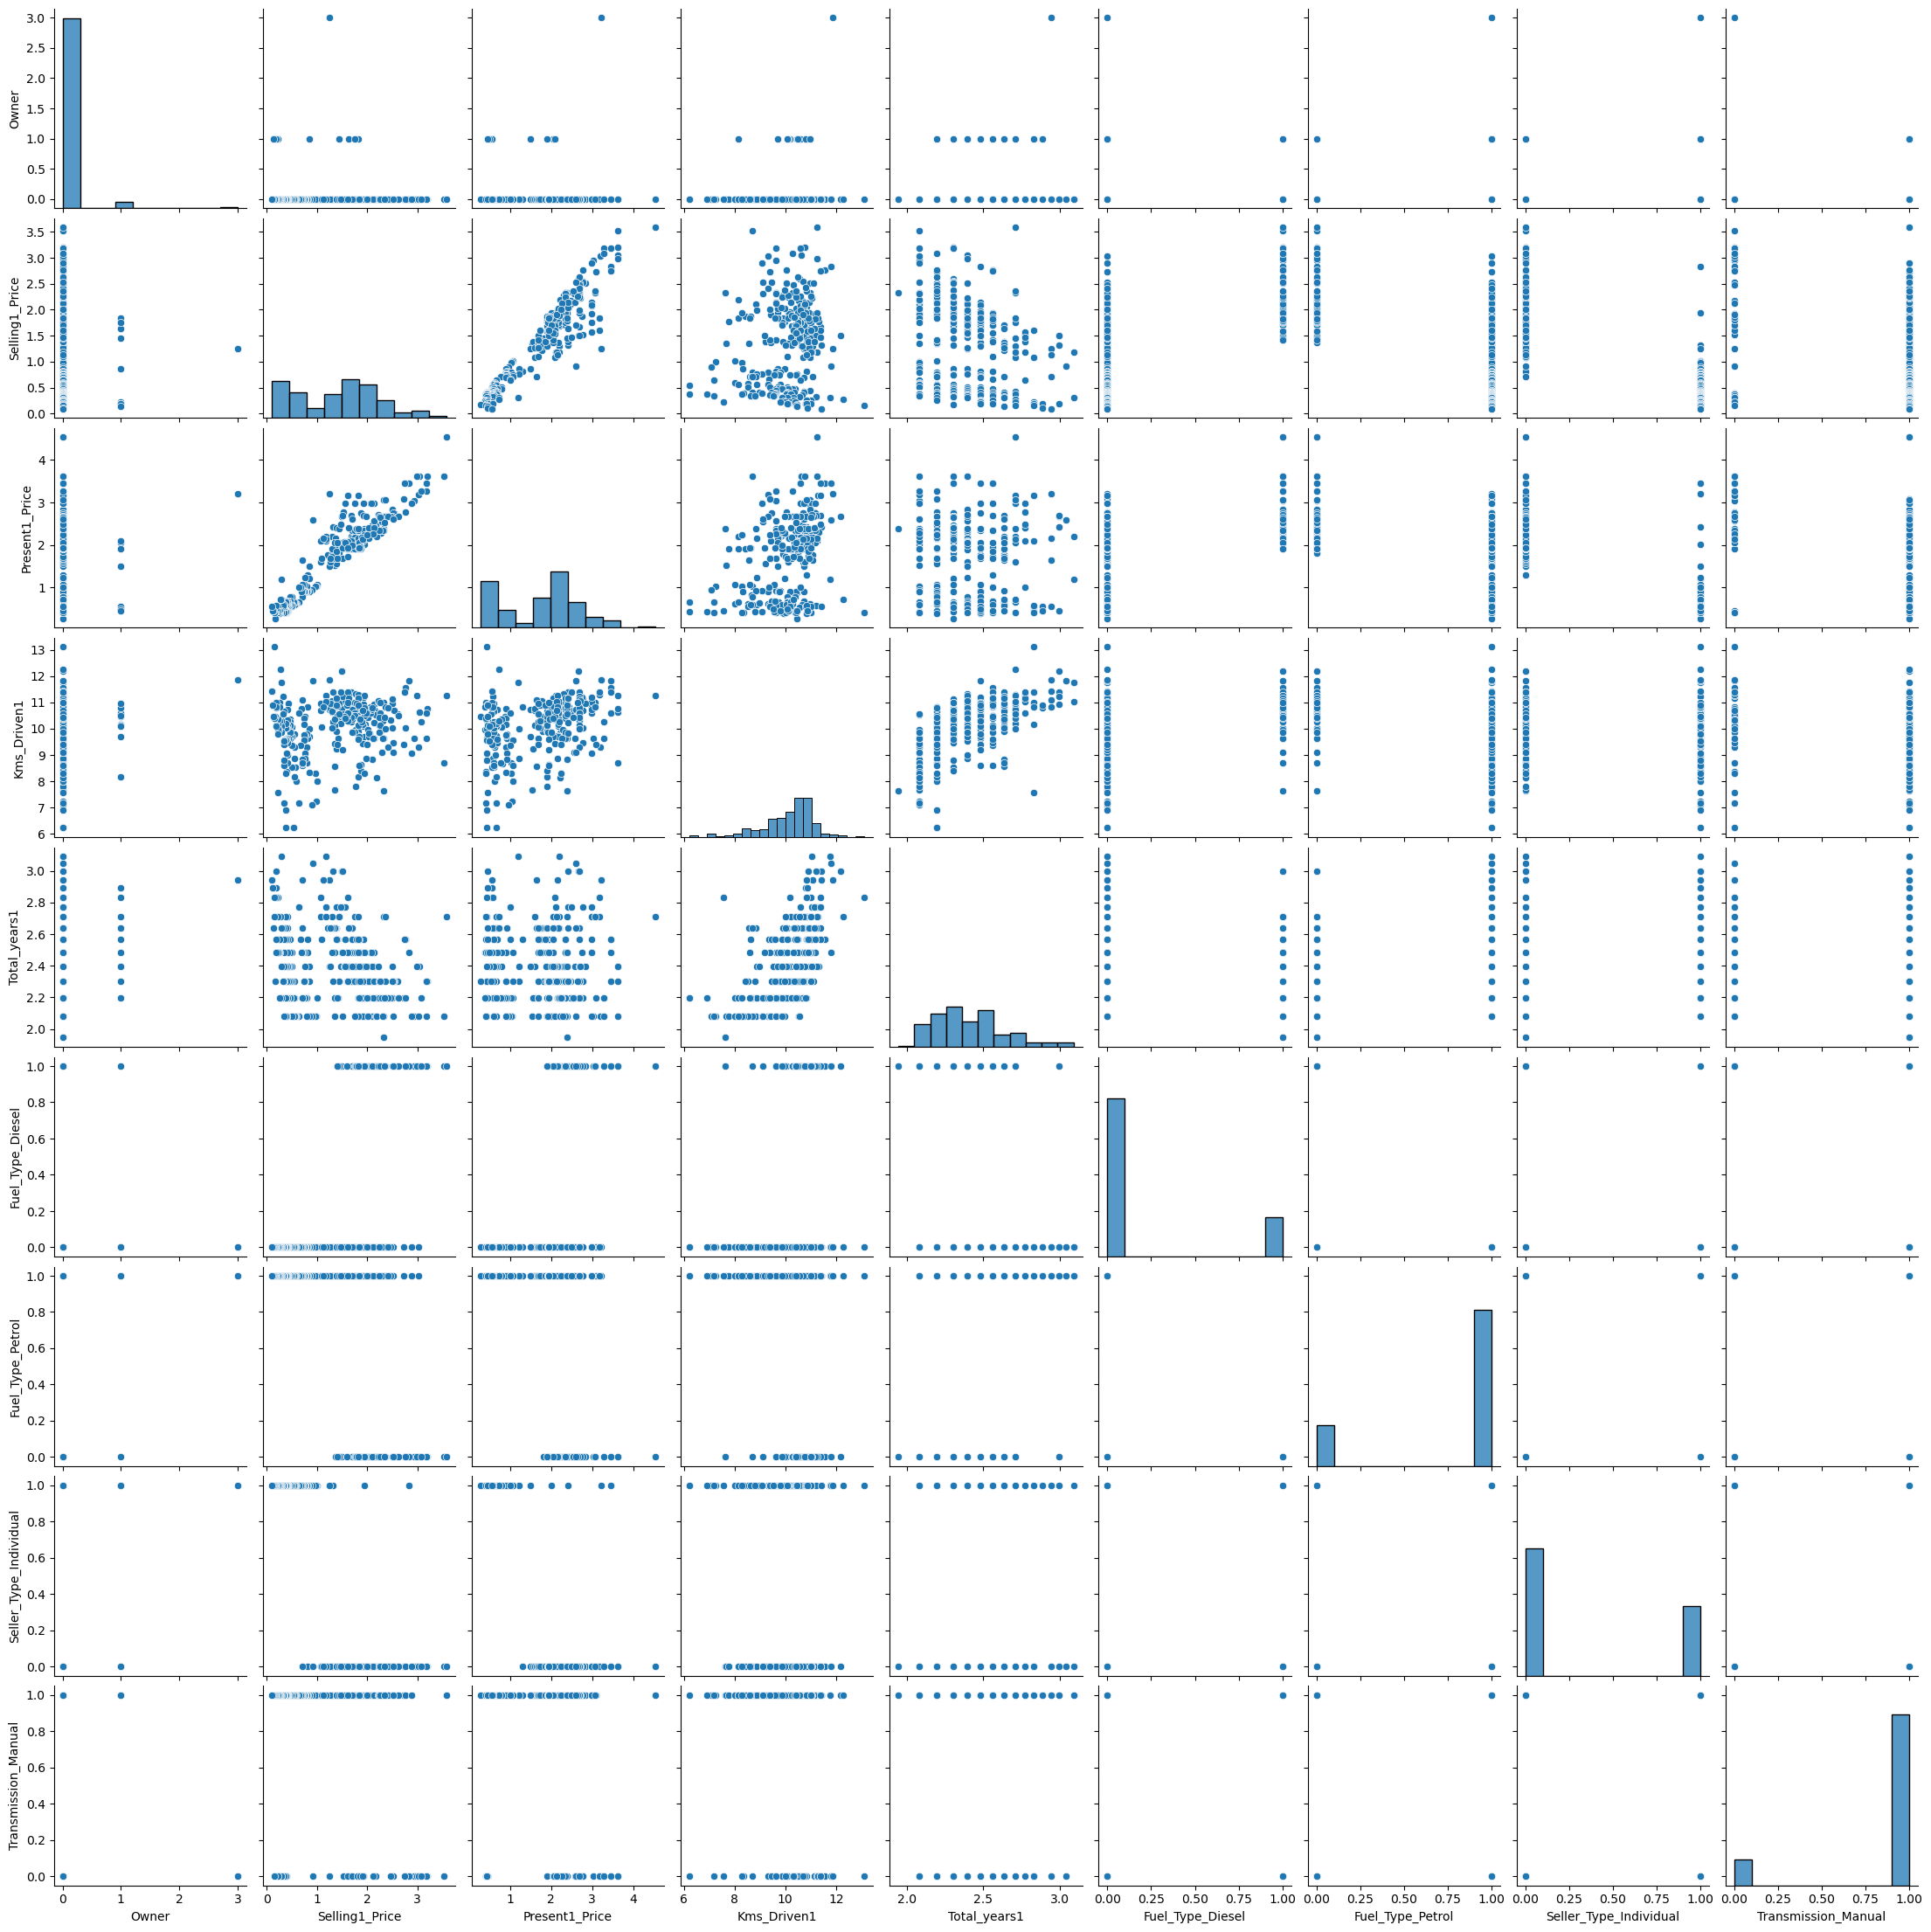

In [75]:
sns.pairplot(df3)
plt.show()

In [76]:
residuals = model.resid

plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'resid'

In [58]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
